In [15]:
#准备数据：从文本中解析数据
# 输入：文件名字符串（文件路径）
# 功能：返回训练样本矩阵returnMat和类标签向量classLabelVector
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())  #获得文件中的数据行的行数
    #print('numberOfLines(数据行数):',numberOfLines)
    #语法：len(s)
    #功能：返回对象长度或项目个数
    #语法：fileObject.readlines( );
    #功能：用于读取所有行(直到结束符 EOF)并返回列表 
    #zeros(2,3)生成一个2*3的矩阵，元素全为0
    returnMat = zeros((numberOfLines, 3)) #prepare matrix to return
    classLabelVector = []  # prepare labels return
    #print('returnMat(构造的一个空矩阵):',returnMat)   
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        #语法：str.strip([chars]) 
        #功能：返回移除字符串头尾指定的字符生成的新字符串（默认是去除首尾空格）
        line = line.strip()
        #语法：str.split(str="", num=string.count(str))
        #      str 分隔符，默认为所有的空字符，包括空格、换行(\n)、制表符(\t)等。
        #      num 分割次数
        #功能： 返回分割后的字符串列表
        listFromLine = line.split('\t')  #以'\t'切割字符串
        #每列的属性数据
        returnMat[index, :] = listFromLine[0:3] #[0:3]表示，从索引0开始取，直到索引3为止，但不包括索引3
        #每列的类别数据，就是label标签数据
        classLabelVector.append(int(listFromLine[-1])) #-1作索引，获取最后一列数据
        #int告诉它列表中存储的元素值为整型，否则会将这些元素当做字符串处理！
        index += 1
        #返回数据矩阵returnMat和classLabelVector
    return returnMat, classLabelVector

In [16]:
import numpy as np
from numpy import *
datingDataMat,datingLabels = file2matrix(r'C:/Users/LIU/Desktop/wu1902/预测约会配对/KNN_algorithm3005/datingTestSet2.txt')

In [17]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [18]:
datingLabels[:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

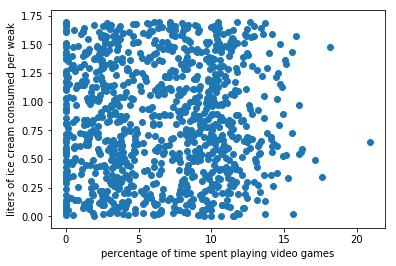

In [20]:
import matplotlib
import matplotlib.pyplot as plt
plt.xlabel('percentage of time spent playing video games')
plt.ylabel('liters of ice cream consumed per weak')
plt.scatter(datingDataMat[:,1],datingDataMat[:,2])
plt.show()

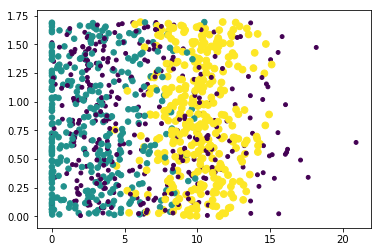

In [21]:
figure = plt.figure()
plt.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*array(datingLabels),15.0*array(datingLabels))
plt.show()

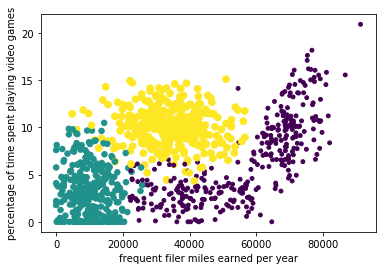

In [23]:
fig = plt.figure()
plt.scatter(datingDataMat[:,0],datingDataMat[:,1],15.0*array(datingLabels),15.0*array(datingLabels))
plt.xlabel('frequent filer miles earned per year')
plt.ylabel('percentage of time spent playing video games')
plt.show()

In [24]:
# 输入：数据集
# 功能：返回归一化的数据集，最大值和最小值之差以及最小值
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    print('minVals(特征的极小值):',minVals)
    maxVals = dataSet.max(0)
    print('maxVals(特征的极大值):',maxVals)
    ranges = maxVals - minVals   
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    print('m(数据集行数)',m)
    normDataSet = dataSet - tile(minVals,(m,1))
    normDataSet = normDataSet / tile(ranges,(m,1))
    return normDataSet,ranges,minVals

In [25]:
autoNorm(datingDataMat)

minVals(特征的极小值): [0.       0.       0.001156]
maxVals(特征的极大值): [9.1273000e+04 2.0919349e+01 1.6955170e+00]
m(数据集行数) 1000


(array([[0.44832535, 0.39805139, 0.56233353],
        [0.15873259, 0.34195467, 0.98724416],
        [0.28542943, 0.06892523, 0.47449629],
        ...,
        [0.29115949, 0.50910294, 0.51079493],
        [0.52711097, 0.43665451, 0.4290048 ],
        [0.47940793, 0.3768091 , 0.78571804]]),
 array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00]),
 array([0.      , 0.      , 0.001156]))

In [27]:
#      输入为四个参数
#      用于输入向量是inX，输入的训练样本集为dataSet，标签向量为labels，k
#         表示用于选择最近邻居的数目。
#     注意：labels元素数目和矩阵dataSet的行数相同
#     程序使用欧式距离公式。此外，还有Lp距离或Minkowski距离

def classify0(inX, dataSet, labels, k):
    #1.距离计算
    dataSetSize = dataSet.shape[0] #获取训练样本数据集的个数
    #print('dataSetSize（训练样本数据集的个数）:',dataSetSize)
    diffMat = tile(inX,(dataSetSize,1)) - dataSet #具体这一步的操作就是生成和训练样本对应的矩阵，并与训练样本求差
    #语法：numpy.tile(A,reps)
    #tile:列—dataSetSize表示复制的行数 行—1表示对inX的重复的次数
    #print((inX,(dataSetSize,1)))
    #print('tile的功能(将inX复制了dataSetSize行)：')
    #print(tile(inX,(dataSetSize,1)))

    sqDiffMat = diffMat**2  #求平方
    sqDistances = sqDiffMat.sum(axis=1)  #对平方后的矩阵每一行进行相加
    distance=sqDistances**0.5 #开根号
    sortedDistIndicies=distance.argsort()  #距离从小到大（从近到远）的排列，并返回其所对应的索引
    #print('sortedDistIndicies(距离由近到远的点的索引):',sortedDistIndicies)


    #2.选择距离最小的k个点
    classCount={}  #定义一个字典
    #print('labels（标签分别是）:',labels)
    for i in range (k): #range(k) 创建一个有序数组，具体为[0,1,2....k-1]
        #找到该样本的类型
        voteIlabel = labels[sortedDistIndicies[i]] 
        #get 返回键值key对应的值；如果key没有在字典里，则返回default参数的值，默认为0。
        #功能是计算每个标签类别的个数
        classCount[voteIlabel] = classCount.get(voteIlabel,0)+1  #在字典中将该类型加一
        #语法：dict.get(key, default=None)
        #key --字典中要查找的值；default --如果指定键的值不存在时，返回该默认值值。（默认为None） 

    #3.排序并返回出现最多的那个类型
    #语法：dict.items()  功能：以列表返回可遍历的（键，值）元组数组
    #例如： dict = {'Name': 'zhangzhiming', 'Age': 23}    print('value: %s' % dict.items())
    #输出：value: dict_items([('Name', 'zhangzhiming'), ('Age', 23)])

    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    #语法：sorted(iterable,*,key=None,reverse=False)
    #key按第一个域进行排序，默认False为升序排序。此处True为逆序,即按照频率从大到小次序排序。
    #sort 是应用在 list 上的方法，sorted 可以对所有可迭代的对象进行排序操作。
    #sort是在原有基础上排序，sorted 排序是产生一个新的列表。

    #语法： operator.itemgetter(item)
    #功能： 用于获取对象的指定维数据，参数为序号
    #注意： operator.itemgetter函数获取的不是值，而是定义了一个函数。通过该函数作用到对象上，才能获取值。
    #示例：import operator
    #      a=[1,2,3]
    #      b=operator.itemgetter(1)
    #      b(a)
    #输出：2   <获取对象的第一个域的值>
    #print('sortedClassCount:',sortedClassCount)
    return sortedClassCount[0][0]  #最后返回发生频率最高的元素标签。

In [28]:
# 测试算法：验证分类器的正确性
# 功能：返回分类的错误率
def datingClassTest():
    hoRatio = 0.10
    datingDataMat,datingLabels = file2matrix(r'C:/Users/LIU/Desktop/wu1902/预测约会配对/KNN_algorithm3005/datingTestSet2.txt')
    normMat,ranges,minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],1)
        print('the classifierResult came back witj:%d,the real answer is :%d'%(classifierResult,datingLabels[i]))
        if (classifierResult != datingLabels[i]) : errorCount += 1.0
    print("the total error rate is :%f"%(errorCount/float(numTestVecs)))

In [29]:
import operator
from operator import *
datingClassTest()

minVals(特征的极小值): [0.       0.       0.001156]
maxVals(特征的极大值): [9.1273000e+04 2.0919349e+01 1.6955170e+00]
m(数据集行数) 1000
the classifierResult came back witj:3,the real answer is :3
the classifierResult came back witj:2,the real answer is :2
the classifierResult came back witj:1,the real answer is :1
the classifierResult came back witj:1,the real answer is :1
the classifierResult came back witj:1,the real answer is :1
the classifierResult came back witj:1,the real answer is :1
the classifierResult came back witj:3,the real answer is :3
the classifierResult came back witj:3,the real answer is :3
the classifierResult came back witj:1,the real answer is :1
the classifierResult came back witj:3,the real answer is :3
the classifierResult came back witj:1,the real answer is :1
the classifierResult came back witj:1,the real answer is :1
the classifierResult came back witj:2,the real answer is :2
the classifierResult came back witj:1,the real answer is :1
the classifierResult came back witj:1,t

In [32]:
# 使用算法，构建完整可用系统
# 找到某人并输入信息，程序会给出她对对方的喜欢城府的预测值
def classifyPerson():
    resultList = ['一点也不喜欢','魅力一般的人','极具魅力']
    percentTats = float(input('玩游戏所耗的时间百分比？'))
    ffMiles = float(input('每年获得飞行常客里程数？'))
    iceCream = float(input('每周消费的冰激淋公升数'))
    datingDataMat,datingLabels = file2matrix(r'C:/Users/LIU/Desktop/wu1902/预测约会配对/KNN_algorithm3005/datingTestSet2.txt')
    normMat,ranges,minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles,percentTats,iceCream])
    classifierResult = classify0((inArr - minVals)/ranges,normMat,datingLabels,3)
    print('You will probably like this person:',resultList[classifierResult - 1])

In [36]:
classifyPerson()

玩游戏所耗的时间百分比？10
每年获得飞行常客里程数？200000
每周消费的冰激淋公升数0.2
minVals(特征的极小值): [0.       0.       0.001156]
maxVals(特征的极大值): [9.1273000e+04 2.0919349e+01 1.6955170e+00]
m(数据集行数) 1000
You will probably like this person: 一点也不喜欢
